In [1]:


# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
warnings.filterwarnings('ignore')


# Pretty display for notebooks
%matplotlib inline

# Load the entire and then the required city subset from total dataset
try:
    data = pd.read_csv("weatherAUS.csv")
    data = data.loc[data.Location=='Albury']
    print("The required subset has {} samples with {} features each.".format(*data.shape))
   
except:
    print("Dataset could not be loaded. Is the dataset missing?")





The required subset has 3011 samples with 24 features each.


In [2]:
display(data.head(n=3))

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No


In [3]:
data.count().sort_values()

Sunshine            0
Evaporation         0
Cloud9am         1282
Cloud3pm         1415
WindDir9am       2494
WindDir3pm       2969
RainToday        2991
Rainfall         2991
WindGustDir      3001
WindGustSpeed    3001
WindSpeed3pm     3004
MinTemp          3005
Temp3pm          3007
Humidity9am      3007
Humidity3pm      3007
Temp9am          3007
Pressure3pm      3007
WindSpeed9am     3007
MaxTemp          3010
Date             3011
RISK_MM          3011
Location         3011
Pressure9am      3011
RainTomorrow     3011
dtype: int64

In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,3005.000000,3010.000000,2991.000000,0.0,0.0,3001.000000,3007.000000,3004.000000,3007.000000,3007.000000,3011.000000,3007.000000,1282.000000,1415.000000,3007.000000,3007.000000,3011.000000
mean,9.520899,22.630963,1.925710,NaN,NaN,32.953016,8.221816,14.378828,74.108081,47.884935,1018.367253,1015.755504,6.392356,5.419788,14.348620,21.364716,1.914381
std,6.062028,7.796728,6.249052,NaN,NaN,13.362165,6.744532,7.196747,17.437693,19.833037,7.361457,7.111794,2.388112,2.827758,6.373137,7.525479,6.229975
min,-2.800000,6.800000,0.000000,NaN,NaN,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000,0.000000
25%,4.700000,15.800000,0.000000,NaN,NaN,24.000000,4.000000,9.000000,61.000000,33.000000,1013.400000,1010.700000,5.000000,2.000000,9.200000,14.900000,0.000000
50%,9.100000,21.900000,0.000000,NaN,NaN,31.000000,7.000000,13.000000,76.000000,47.000000,1018.400000,1015.600000,8.000000,7.000000,14.100000,20.600000,0.000000
75%,14.300000,28.900000,0.400000,NaN,NaN,41.000000,11.000000,19.000000,88.000000,61.000000,1023.300000,1020.500000,8.000000,8.000000,19.300000,27.200000,0.400000
max,28.300000,44.800000,104.200000,NaN,NaN,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,8.000000,8.000000,34.500000,43.400000,104.200000


In [5]:
data = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],axis=1)

In [6]:
data = data.dropna(how='any')

In [7]:
data.info();    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 3009
Data columns (total 17 columns):
MinTemp          2440 non-null float64
MaxTemp          2440 non-null float64
Rainfall         2440 non-null float64
WindGustDir      2440 non-null object
WindGustSpeed    2440 non-null float64
WindDir9am       2440 non-null object
WindDir3pm       2440 non-null object
WindSpeed9am     2440 non-null float64
WindSpeed3pm     2440 non-null float64
Humidity9am      2440 non-null float64
Humidity3pm      2440 non-null float64
Pressure9am      2440 non-null float64
Pressure3pm      2440 non-null float64
Temp9am          2440 non-null float64
Temp3pm          2440 non-null float64
RainToday        2440 non-null object
RainTomorrow     2440 non-null object
dtypes: float64(12), object(5)
memory usage: 295.5+ KB


In [8]:
!pip install --user seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
data.RainTomorrow.value_counts()

No     1913
Yes     527
Name: RainTomorrow, dtype: int64

In [10]:
data.shape

(2440, 17)

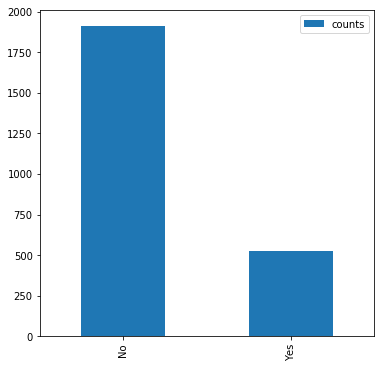

In [11]:
import matplotlib.pyplot as plt
data.RainTomorrow.value_counts().plot(kind = "bar",figsize = (6,6),label="counts");
plt.legend()
plt.show()

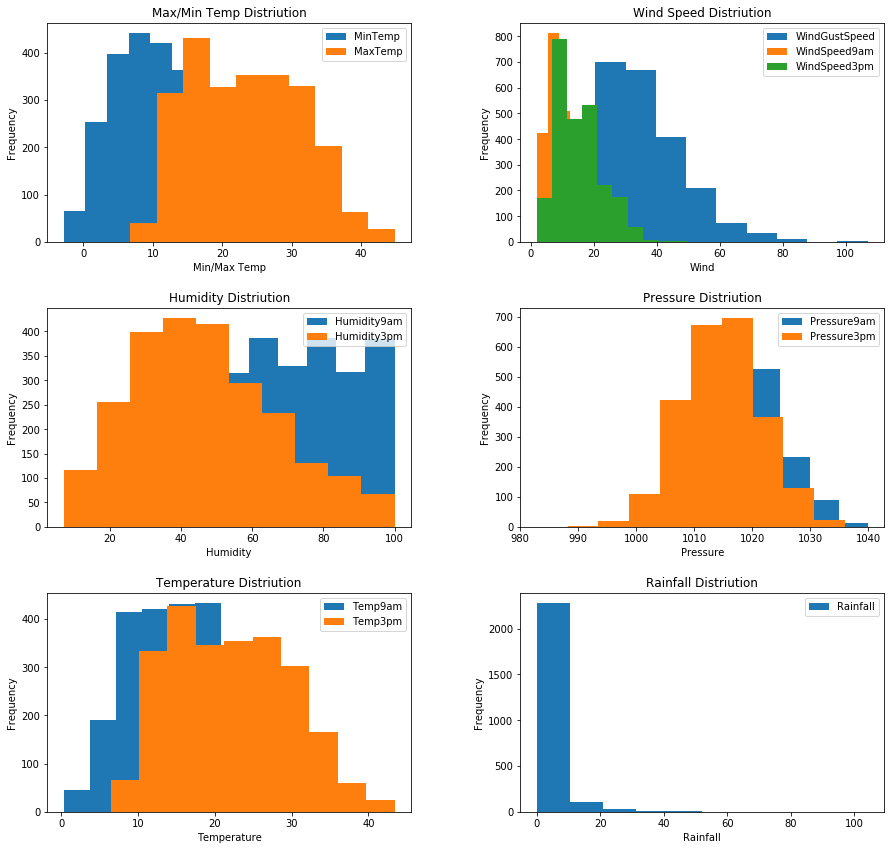

In [12]:

plt.figure(figsize=(15,25))
plt.subplot(5,2,1)
plt.hist(data.MinTemp,label="MinTemp");
plt.hist(data.MaxTemp,label="MaxTemp");
plt.xlabel("Min/Max Temp")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.title("Max/Min Temp Distriution")

plt.subplot(5,2,2)
plt.hist(data.WindGustSpeed,label="WindGustSpeed");
plt.hist(data.WindSpeed9am,label="WindSpeed9am");
plt.hist(data.WindSpeed3pm,label="WindSpeed3pm");
plt.xlabel("Wind")
plt.ylabel("Frequency")
plt.title("Wind Speed Distriution")
plt.legend(loc='upper right')

plt.subplot(5,2,3)
plt.hist(data.Humidity9am,label="Humidity9am");
plt.hist(data.Humidity3pm,label="Humidity3pm");
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Humidity Distriution")
plt.legend(loc='upper right')

plt.subplot(5,2,4)
plt.hist(data.Pressure9am,label="Pressure9am");
plt.hist(data.Pressure3pm,label="Pressure3pm");
plt.xlabel("Pressure")
plt.ylabel("Frequency")
plt.title("Pressure Distriution")
plt.legend(loc='upper right')

plt.subplot(5,2,5)
plt.hist(data.Temp9am,label="Temp9am");
plt.hist(data.Temp3pm,label="Temp3pm");
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distriution")
plt.legend(loc='upper right')

plt.subplot(5,2,6)
plt.hist(data.Rainfall,label="Rainfall");
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.title("Rainfall Distriution")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


In [13]:
display(data.corr(method='pearson', min_periods=1))

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.788069,0.090190,0.339622,0.201239,0.173513,-0.545613,-0.369475,-0.517136,-0.536718,0.922730,0.760671
MaxTemp,0.788069,1.000000,-0.158683,0.172018,-0.073267,0.030367,-0.738059,-0.757751,-0.250778,-0.349465,0.919372,0.990363
Rainfall,0.090190,-0.158683,1.000000,0.137497,0.173748,0.105702,0.267838,0.294935,-0.264734,-0.195874,-0.043576,-0.164311
WindGustSpeed,0.339622,0.172018,0.137497,1.000000,0.475108,0.662842,-0.261710,-0.090622,-0.576527,-0.562840,0.296458,0.137892
WindSpeed9am,0.201239,-0.073267,0.173748,0.475108,1.000000,0.424867,-0.204975,0.058466,-0.387454,-0.294299,0.104075,-0.098618
WindSpeed3pm,0.173513,0.030367,0.105702,0.662842,0.424867,1.000000,-0.139968,-0.091799,-0.474004,-0.420116,0.129744,0.014802
Humidity9am,-0.545613,-0.738059,0.267838,-0.261710,-0.204975,-0.139968,1.000000,0.756558,0.226123,0.272455,-0.727632,-0.724131
Humidity3pm,-0.369475,-0.757751,0.294935,-0.090622,0.058466,-0.091799,0.756558,1.000000,0.038712,0.101741,-0.571710,-0.787971
Pressure9am,-0.517136,-0.250778,-0.264734,-0.576527,-0.387454,-0.474004,0.226123,0.038712,1.000000,0.959264,-0.423190,-0.215330
Pressure3pm,-0.536718,-0.349465,-0.195874,-0.562840,-0.294299,-0.420116,0.272455,0.101741,0.959264,1.000000,-0.484223,-0.318506


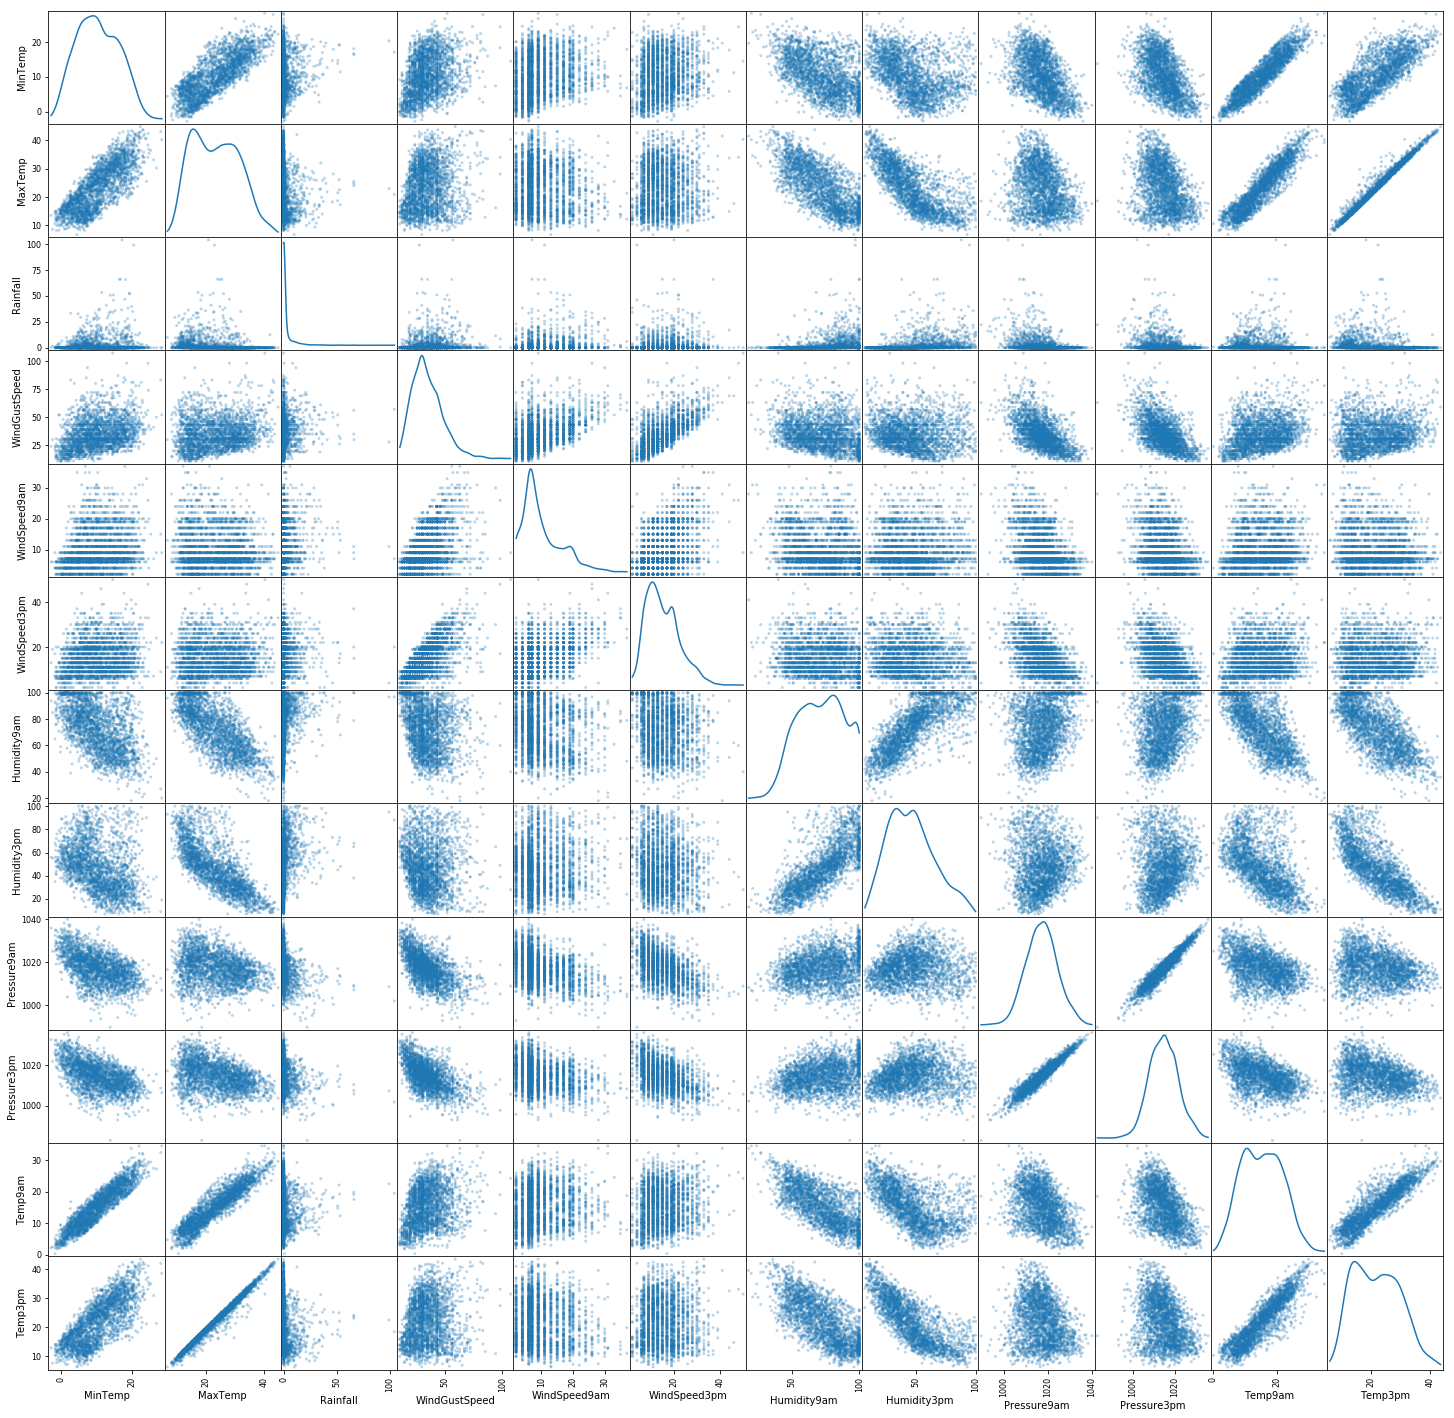

In [14]:
import pandas as pd
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.3, figsize = (25,25), diagonal = 'kde');

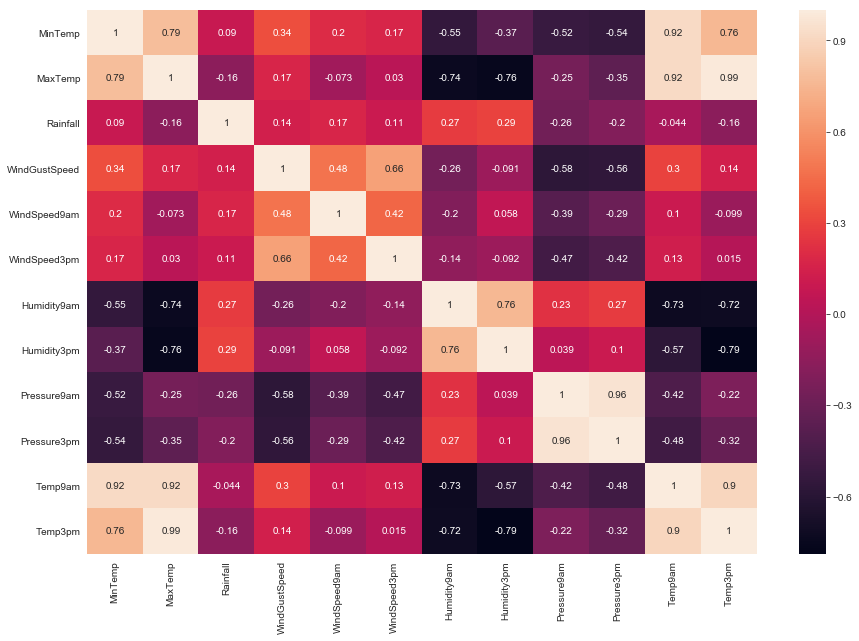

In [15]:
#PLOT HEATMAP to show how each and every column is correlated
import seaborn as sns
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.heatmap(data.corr(),annot = True)
plt.show()

In [16]:
# find the data points with extreme high or low values
from scipy import stats
print("Initial Shape of dataset is {}\n".format(data.shape))
z = np.abs(stats.zscore(data._get_numeric_data()))
print(z)
data= data[(z < 3).all(axis=1)]
print("\nAfter removing outliers the shape of dataset is {}".format(data.shape))

Initial Shape of dataset is (2440, 17)

[[0.51843234 0.06482183 0.23522136 ... 1.12075076 0.26305223 0.03375249]
 [0.51051842 0.21395047 0.32449498 ... 1.0176266  0.31153502 0.29342086]
 [0.43268645 0.28997928 0.32449498 ... 0.88503839 0.92565032 0.14946459]
 ...
 [1.57376754 1.07853928 0.2947371  ... 1.84038596 1.91867316 1.05453335]
 [1.59091672 1.45868332 0.32449498 ... 0.44084373 2.03179966 1.55183684]
 [1.59091672 1.17991102 0.2947371  ... 0.36718361 1.83786852 1.17231576]]

After removing outliers the shape of dataset is (2333, 17)


In [17]:
#See unique values and convert them to int using pd.getDummies()
data['RainToday'] = data['RainToday'].apply(lambda x:0 if x=="No" else 1)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x:0 if x=="No" else 1)

categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
# transform the categorical columns
data = pd.get_dummies(data, columns = categorical_columns)


In [18]:
data.reset_index(inplace = True)

In [19]:
display(data.head(n=10))

,index,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,0,0,0,0,0,0,0,1,0,0
1,1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,1,0,0,0,0,0,0,0,0,0
2,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,0,0,0,0,0,0,0,1,0,0
3,3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,0,0,0,1,0,0,0,0,0,0
4,4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,0,0,0,0,0,0,0,0,0,0
5,5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,...,0,0,0,0,0,0,0,1,0,0
6,6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,...,0,0,0,0,0,0,1,0,0,0
7,7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,...,0,0,0,0,1,0,0,0,0,0
8,9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,...,0,0,1,0,0,0,0,0,0,0
9,10,13.4,30.4,0.0,30.0,17.0,6.0,48.0,22.0,1011.8,...,0,0,0,0,1,0,0,0,0,0


In [20]:
display(data.RainToday.head(n=10))
display(data.RainTomorrow.head(n=10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: RainToday, dtype: int64

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: RainTomorrow, dtype: int64

In [21]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']


data = pd.DataFrame(data = data)
data[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(data.head(n = 5))

,index,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0,0.547297,0.423684,0.027273,0.523810,0.692308,0.666667,0.623377,0.161290,0.272727,...,0,0,0,0,0,0,0,1,0,0
1,1,0.344595,0.481579,0.000000,0.523810,0.076923,0.606061,0.272727,0.193548,0.343980,...,1,0,0,0,0,0,0,0,0,0
2,2,0.530405,0.497368,0.000000,0.555556,0.653846,0.727273,0.194805,0.247312,0.270270,...,0,0,0,0,0,0,0,1,0,0
3,3,0.405405,0.557895,0.000000,0.206349,0.346154,0.212121,0.285714,0.096774,0.515971,...,0,0,0,1,0,0,0,0,0,0
4,4,0.685811,0.671053,0.045455,0.476190,0.192308,0.545455,0.766234,0.279570,0.348894,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#preserving the chronological order and preventing randomization as we are dealing with time series data

rain = data['RainTomorrow']
features_final = data.drop('RainTomorrow',axis=1)

x=int(data.shape[0]*0.8)

X_train = features_final.loc[0:x-1]

X_test = features_final.loc[x:]

y_train = rain.loc[0:x-1]

y_test = rain.loc[x:]
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 1866 samples.
Testing set has 467 samples.


In [23]:
#Base model or benchmark model
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train,y_train)
predictions_bench = clf.predict(X_test)
test_accuracy_bench = accuracy_score(y_test,predictions_bench)
test_fscore_bench = fbeta_score(y_test,predictions_bench,0.5)
print("Accuracy for benchmark is {} and F-score for benchmark is {}".format(test_accuracy_bench,test_fscore_bench))

Accuracy for benchmark is 0.7451820128479657 and F-score for benchmark is 0.4331864904552129


In [25]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train,predictions_train,0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    # Success
    print("{} trained on {} samples.\n".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [27]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from time import time

# TODO: Initialize the three models

clf_a = KNeighborsClassifier()
clf_b = DecisionTreeClassifier(random_state = 0)
clf_c = LogisticRegression(random_state = 0)

# TODO: Calculate the number of samples for 25%, 50%, and 100% of the training data
samples_100 = (len(y_train))
samples_50 = (len(y_train)*50)//10
samples_25 = (len(y_train)*25)//100

# Collect results on the learners
results = {}
for clf in [clf_a, clf_b, clf_c]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_25, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)





KNeighborsClassifier trained on 466 samples.

KNeighborsClassifier trained on 9330 samples.

KNeighborsClassifier trained on 1866 samples.

DecisionTreeClassifier trained on 466 samples.

DecisionTreeClassifier trained on 9330 samples.

DecisionTreeClassifier trained on 1866 samples.

LogisticRegression trained on 466 samples.

LogisticRegression trained on 9330 samples.

LogisticRegression trained on 1866 samples.



In [28]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (15,10))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["25%", "50%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Acc Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Set additional plots invisibles
    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    # Create legend
    for i, learner in enumerate(results.keys()):
        plt.bar(0, 0, color=colors[i], label=learner)
    plt.legend()
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.06)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

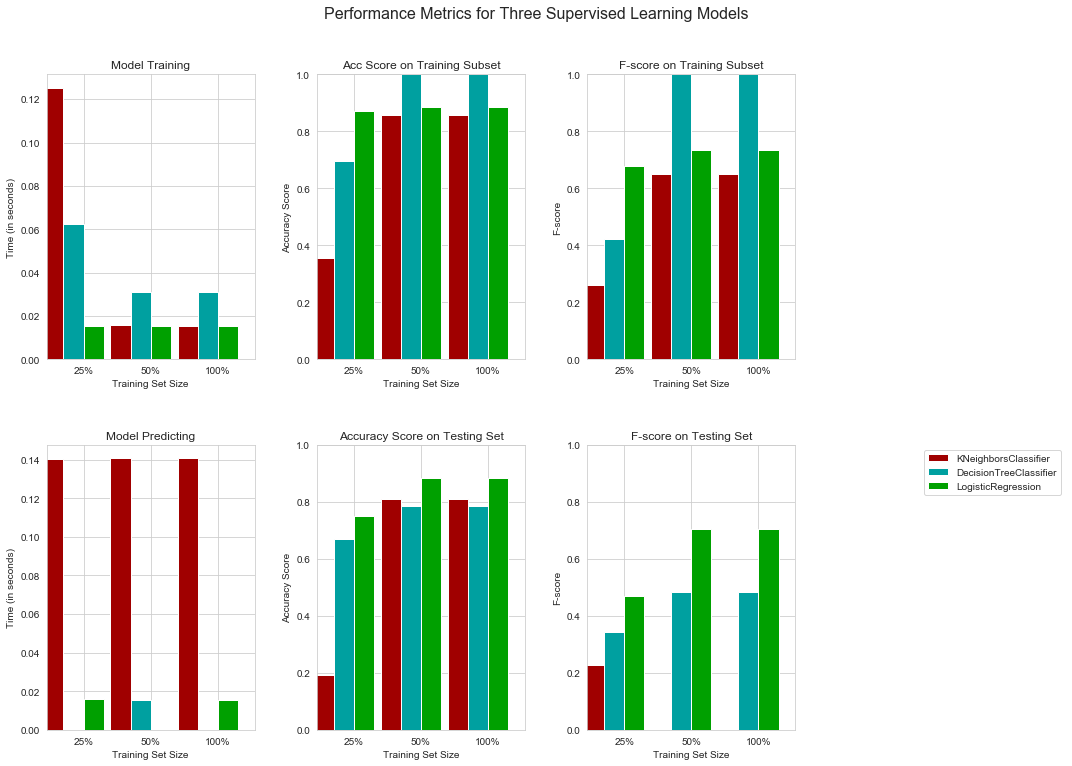

In [29]:
evaluate(results)


In [30]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
# TODO: Initialize the classifier
clf = LogisticRegression(random_state = 0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameter={'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000],'penalty':['l1','l2']}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameter,scoring=scorer,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8822
F-score on testing data: 0.7064

Optimized Model
------
Final accuracy score on the testing data: 0.8865
Final F-score on the testing data: 0.7182


c:\program files (x86)\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
# TODO: Import a supervised learning model that has 'feature_importances_'

from sklearn.ensemble import AdaBoostClassifier
# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_



In [32]:

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper right')
    plt.tight_layout()
    plt.show()  

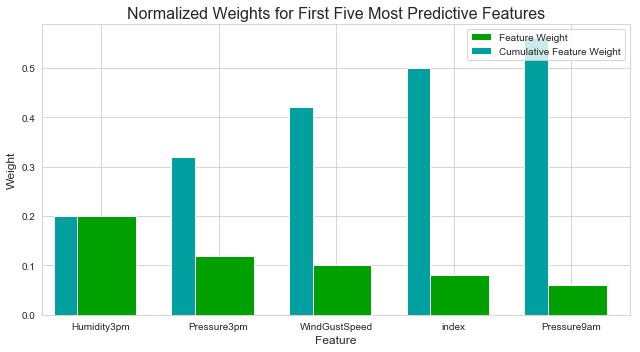

In [33]:
feature_plot(importances, X_train, y_train)

In [34]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))



Final Model trained on full data
------
Accuracy on testing data: 0.8865
F-score on testing data: 0.7182

Final Model trained on reduced data
------
Accuracy on testing data: 0.8758
F-score on testing data: 0.6891


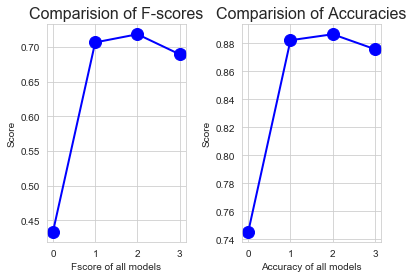

In [35]:
#trying to plot accuracy of three and f-score of three
fscore_list = [test_fscore_bench,fbeta_score(y_test, predictions, beta = 0.5),
               fbeta_score(y_test, best_predictions, beta = 0.5),
               fbeta_score(y_test, reduced_predictions, beta = 0.5)]
accuracy_list = [test_accuracy_bench,accuracy_score(y_test, predictions),
                 accuracy_score(y_test, best_predictions),
                 accuracy_score(y_test, reduced_predictions)
                ]
plt.subplot(1,2,1)
plt.plot(fscore_list,
         label="Fscore for bench,unoptimised,optimised,reduced",
         linewidth=2
         ,markersize=12,
         marker='o',
         color='blue',
         )
plt.xlabel("Fscore of all models")
plt.ylabel("Score")
plt.title("Comparision of F-scores",fontsize = 16)


plt.subplot(1,2,2)
plt.plot(accuracy_list,
         label="Accuracy for bench,optimised,reduced",
         linewidth=2,
         markersize=12,
         marker='o',
         color='blue')
plt.xlabel("Accuracy of all models")
plt.ylabel("Score")
plt.title("Comparision of Accuracies",fontsize = 16)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()
